<a href="https://colab.research.google.com/github/ShreerajSangle/multi-label-ticket-classification/blob/main/EATS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install psutil pynvml codecarbon tensorflow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 610.1/610.1 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.0/278.0 kB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 57.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.5/92.5 kB 6.5 MB/s eta 0:00:00
  Attempting uninstall: termcolor
    Found existing installation: termcolor 3.1.0
    Uninstalling termcolor-3.1.0:
      Successfully uninstalled termcolor-3.1.0
  Attempting uninstall: psutil
    Found existing installation: psutil 5.9.5
    Uninstalling psutil-5.9.5:
      Successfully uninstalled psutil-5.9.5
  Attempting uninstall: httpx
    Found existing installation: httpx 0.28.1
    Uninstalling httpx-0.28.1:
      Successfully uninstalled httpx-0.28.1
ERROR: pip's dependency resolver does not currently take int

In [2]:
import time
import psutil
from pynvml import *

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from codecarbon import EmissionsTracker
import matplotlib.pyplot as plt


In [3]:
# Load and normalize MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Reshape for the dense layers
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

# Define simple model
model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
tracker = EmissionsTracker()
tracker.start()

# Train model
model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

# Stop tracker and print results
emissions = tracker.stop()
print(f"CO2 emissions: {emissions:.6f} kg")


[codecarbon WARNING @ 13:42:24] Multiple instances of codecarbon are allowed to run at the same time.
[codecarbon INFO @ 13:42:24] [setup] RAM Tracking...
[codecarbon INFO @ 13:42:24] [setup] CPU Tracking...
[codecarbon WARNING @ 13:42:25] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon WARNING @ 13:42:25] No CPU tracking mode found. Falling back on estimation based on TDP for CPU. 
 Linux OS detected: Please ensure RAPL files exist at /sys/class/powercap/intel-rapl/subsystem to measure CPU

[codecarbon INFO @ 13:42:25] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon WARNING @ 13:42:25] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 13:42:25] [setup] GPU Tracking...
[codecarbon INFO @ 13:42:25] No GPU found.
[codecarbon INFO @ 13:42:25] The below tracking methods have been set up:
                RAM Tracking Method: RAM power estimation model
               

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8844 - loss: 0.3995 - val_accuracy: 0.9607 - val_loss: 0.1253
Epoch 2/5
 647/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9713 - loss: 0.0924

[codecarbon INFO @ 13:42:40] Energy consumed for RAM : 0.000042 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 13:42:40] Delta energy consumed for CPU with constant : 0.000177 kWh, power : 42.5 W
[codecarbon INFO @ 13:42:41] Energy consumed for All CPU : 0.000177 kWh
[codecarbon INFO @ 13:42:41] 0.000219 kWh of electricity used since the beginning.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9709 - loss: 0.0955 - val_accuracy: 0.9680 - val_loss: 0.1015
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9795 - loss: 0.0640 - val_accuracy: 0.9746 - val_loss: 0.0822
Epoch 4/5
 211/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9885 - loss: 0.0402

[codecarbon INFO @ 13:42:55] Energy consumed for RAM : 0.000083 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 13:42:55] Delta energy consumed for CPU with constant : 0.000177 kWh, power : 42.5 W
[codecarbon INFO @ 13:42:56] Energy consumed for All CPU : 0.000354 kWh
[codecarbon INFO @ 13:42:56] 0.000438 kWh of electricity used since the beginning.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9851 - loss: 0.0472 - val_accuracy: 0.9774 - val_loss: 0.0801
Epoch 5/5
1305/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9886 - loss: 0.0335

[codecarbon INFO @ 13:43:10] Energy consumed for RAM : 0.000125 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 13:43:10] Delta energy consumed for CPU with constant : 0.000177 kWh, power : 42.5 W
[codecarbon INFO @ 13:43:11] Energy consumed for All CPU : 0.000531 kWh
[codecarbon INFO @ 13:43:11] 0.000656 kWh of electricity used since the beginning.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9880 - loss: 0.0352 - val_accuracy: 0.9768 - val_loss: 0.0891


[codecarbon INFO @ 13:43:15] Energy consumed for RAM : 0.000138 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 13:43:15] Delta energy consumed for CPU with constant : 0.000056 kWh, power : 42.5 W
[codecarbon INFO @ 13:43:15] Energy consumed for All CPU : 0.000587 kWh
[codecarbon INFO @ 13:43:15] 0.000725 kWh of electricity used since the beginning.


CO2 emissions: 0.000328 kg


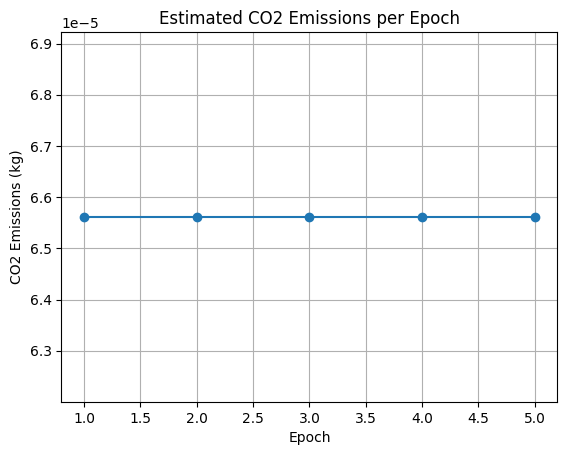

In [5]:
epochs = list(range(1, 6))
emission_values = [emissions / 5] * 5

plt.plot(epochs, emission_values, marker='o')
plt.title('Estimated CO2 Emissions per Epoch')
plt.xlabel('Epoch')
plt.ylabel('CO2 Emissions (kg)')
plt.grid(True)
plt.show()


In [7]:
try:
    nvmlInit()
    handle = nvmlDeviceGetHandleByIndex(0)
    def get_gpu_power_usage():
        return nvmlDeviceGetPowerUsage(handle) / 1000.0
except:
    print("NVML library not found. Skipping GPU power monitoring.")
    def get_gpu_power_usage():
        return 0.0  # Return zero if GPU monitoring not available


NVML library not found. Skipping GPU power monitoring.
